In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

##Descriptive Statistics

###Categorical Data

In [37]:
# Creating Dataset
weather_df = pd.DataFrame({'temp':[55,34,80,75,53],
                            'weather':['windy','cloudy','sunny','rainy','sunny']})

In [38]:
weather_df.head()

temp weather
0    55   windy
1    34  cloudy
2    80   sunny
3    75   rainy
4    53   sunny

In [39]:
weather_df['weather_encoded'] = weather_df.weather.map({
    'windy':1,'cloudy':2,'sunny':3,'rainy':4
})

In [40]:
weather_df.head()

temp weather  weather_encoded
0    55   windy                1
1    34  cloudy                2
2    80   sunny                3
3    75   rainy                4
4    53   sunny                3

In [41]:
# using pd.getdummies
pd.get_dummies(weather_df.weather)

cloudy  rainy  sunny  windy
0       0      0      0      1
1       1      0      0      0
2       0      0      1      0
3       0      1      0      0
4       0      0      1      0

Text(0, 0.5, '')

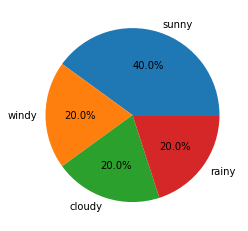

In [42]:
weather_df.weather.value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

In [43]:
# Creating Another DataFrame 
student_df = pd.DataFrame({
    'name':['alice','bob','sam','carol','eli','fran'],
    'sex':['female','male','male','female','female','male'],
    'class':['fy','so','sr','so','jr','sr'],
    'gpa':[90,93,97,89,95,97],
    'num_classes':[4,3,4,4,3,2]
}) 

In [44]:
student_df.head()

name     sex class  gpa  num_classes
0  alice  female    fy   90            4
1    bob    male    so   93            3
2    sam    male    sr   97            4
3  carol  female    so   89            4
4    eli  female    jr   95            3

In [45]:
student_df['female_flag'] = student_df.sex == 'female'
student_df = student_df.drop('sex',axis = 1)
student_df.head()

name class  gpa  num_classes  female_flag
0  alice    fy   90            4         True
1    bob    so   93            3        False
2    sam    sr   97            4        False
3  carol    so   89            4         True
4    eli    jr   95            3         True

In [46]:
from google.colab import files
uploaded = files.upload()

Saving weather_data_stats.csv to weather_data_stats (1).csv


In [47]:
weather_df = pd.read_csv('weather_data_stats.csv',sep=',')

In [48]:
weather_df.head()

day           city weather
0    0       St Louis   sunny
1    0       New York  cloudy
2    0  San Francisco   sunny
3    1       New York    rain
4    1       St Louis  cloudy

<Axes: >

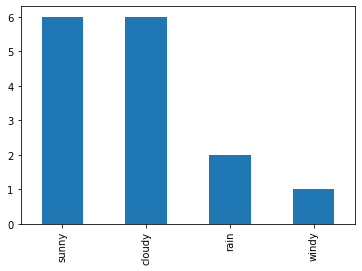

In [49]:
weather_df.weather.value_counts().plot.bar()

<Axes: ylabel='weather'>

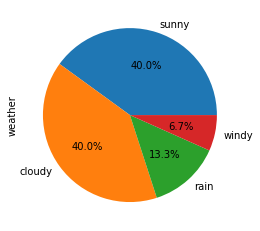

In [50]:
#Visualize the same information we have in the previous step as a pie chart using 
#the plot.pie(autopct='%1.1f%%') method
weather_df.weather.value_counts().plot.pie(autopct = '%1.1f%%')

In [51]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city')

city     New York  San Francisco  St Louis
weather                                   
cloudy        3.0            NaN       3.0
rain          1.0            NaN       1.0
sunny         1.0            4.0       1.0
windy         NaN            1.0       NaN

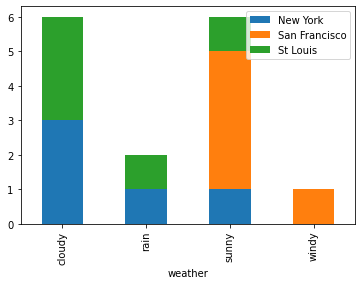

In [52]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city').fillna(0).plot.bar(stacked = True)
plt.legend(loc = 'upper right')

###Numerical Data

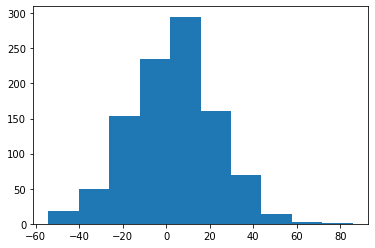

In [53]:
# Createing Data
data = np.random.normal(4,20,size = 1000)
plt.hist(data,bins = 10)
plt.show()

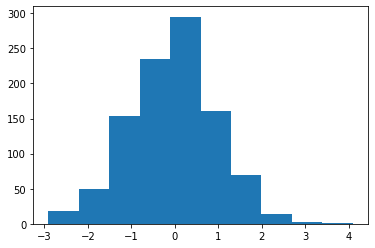

In [54]:
normalized_data = (data-4)/20
plt.hist(normalized_data,bins = 10)
plt.show()

In [55]:
data_mean = np.mean(data)
data_std = np.std(data)
data_mean,data_std

(3.015002393546384, 19.937291400968377)

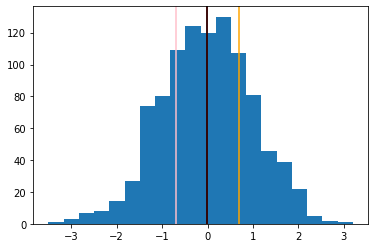

In [64]:
# Visualizing Probability Density Functions
samples = np.random.normal(size = 1000)
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

plt.hist(samples,bins = 20)
plt.axvline(x = mean,c = 'red')
plt.axvline(x= median,c = 'black')
plt.axvline(x = q1,c = 'pink')
plt.axvline(x = q2,c = 'orange')
plt.show()

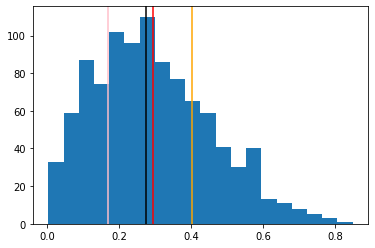

In [67]:
# Apply same on Beta Distribution
samples = np.random.beta(2,5,size = 1000)
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

plt.hist(samples,bins = 20)
plt.axvline(x = mean,c = 'red')
plt.axvline(x= median,c = 'black')
plt.axvline(x = q1,c = 'pink')
plt.axvline(x = q2,c = 'orange')
plt.show()

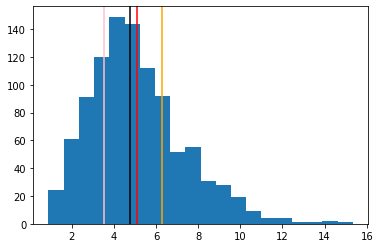

In [69]:
# Apply same on Gamma Distribution
samples = np.random.gamma(5,size = 1000)
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

plt.hist(samples,bins = 20)
plt.axvline(x = mean,c = 'red')
plt.axvline(x= median,c = 'black')
plt.axvline(x = q1,c = 'pink')
plt.axvline(x = q2,c = 'orange')
plt.show()

In [71]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),\
                   'categorical': ['a', 'b', 'a', 'c', 'b'],\
                   'ordinal': [1, 2, 3, 5, 4]})
df.describe()

numerical   ordinal
count   5.000000  5.000000
mean   -0.275603  3.000000
std     1.399032  1.581139
min    -2.377048  1.000000
25%    -0.772888  2.000000
50%    -0.011133  3.000000
75%     0.460559  4.000000
max     1.322496  5.000000

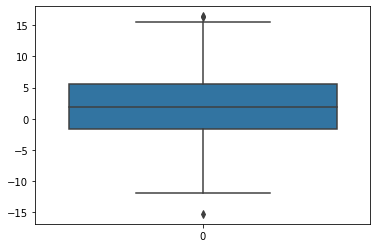

In [73]:
import seaborn as sns
sns.boxplot(np.random.normal(2, 5, size=1000))
plt.show()

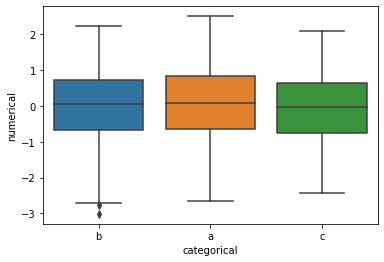

In [75]:
df = pd.DataFrame({'numerical': np.random.normal(size=1000),\
                   'categorical': np.random.choice\
                                  (['a', 'b', 'c'], size=1000),\
                   'ordinal': np.random.choice\
                              ([1, 2, 3, 4, 5], size=1000)})
sns.boxplot(y='numerical', x='categorical', data=df)
plt.show()

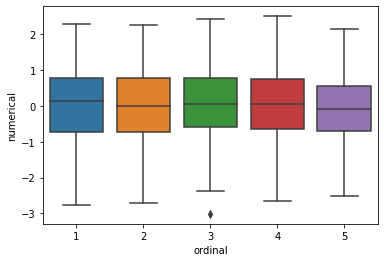

In [76]:
sns.boxplot(y='numerical', x='ordinal', data=df)
plt.show()

##Inferential Statistics

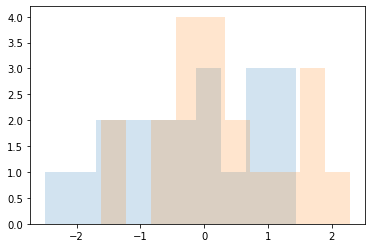

0.14492449024726536

In [83]:
# T-Test
sample_a = np.random.normal(size = 20)
sample_b = np.random.normal(0.2,1,size = 20)
plt.hist(sample_a,alpha = 0.2)
plt.hist(sample_b,alpha = 0.2)
plt.show()

import scipy
scipy.stats.ttest_ind(sample_a,sample_b).pvalue

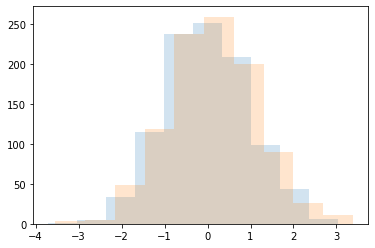

0.0005014745910317877

In [84]:
# again with large Data
sample_a = np.random.normal(size = 1000)
sample_b = np.random.normal(0.2,1,size = 1000)
plt.hist(sample_a,alpha = 0.2)
plt.hist(sample_b,alpha = 0.2)
plt.show()

import scipy
scipy.stats.ttest_ind(sample_a,sample_b).pvalue

here value is less than 0.05 so we can reject our hypothesis that mean of two sample are similar.In essence, with only 20 samples in each array, the first t-test didn't have a high 
enough level of confidence to output a lower p-value, even if the two means were 
indeed different. With 1,000 samples, this difference was more consistent and robust 
so that the second t-test was able to positively output a lower p-value. In general, 
many other statistical methods will similarly prove to be more conclusive as more 
data is used as input.

Correlation Matrix
A correlation matrix is a two-dimensional table containing correlation coefficients 
between each pair of attributes of a given dataset. A correlation coefficient between 
two attributes quantifies their level of linear correlation, or in other words, how 
similarly they behave in a linear fashion. A correlation coefficient lies in the range 
between -1 and +1, where +1 denotes perfect linear correlation, 0 denotes no 
correlation, and -1 denotes perfect negative correlation.


In [86]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df.corr()

x         y         z
x  1.000000  0.884221  0.083391
y  0.884221  1.000000  0.099532
z  0.083391  0.099532  1.000000

In [88]:
uploaded = files.upload()

Saving Inferential_data.csv to Inferential_data (1).csv


In [89]:
df = pd.read_csv('Inferential_data.csv',sep = ",")

In [90]:
df.corr()

x         y         z         t
x  1.000000  0.938023 -0.087976 -0.017707
y  0.938023  1.000000 -0.110122  0.014695
z -0.087976 -0.110122  1.000000  0.168456
t -0.017707  0.014695  0.168456  1.000000

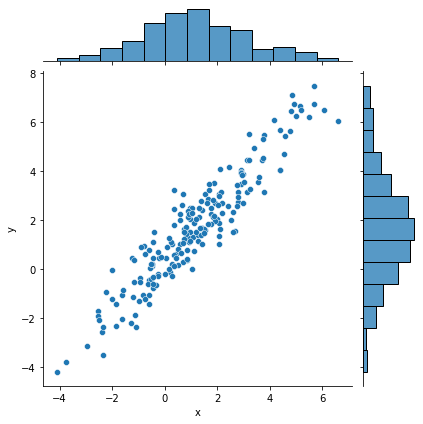

In [91]:
sns.jointplot(x = 'x',y='y',data=df)

In [93]:
scipy.stats.ttest_ind(df['x'],df['y']).pvalue

0.011436482008949079

This p-value is indeed lower than 0.05, allowing us to reject the null hypothesis 
that the two distributions have the same mean, even though they are 
highly correlated.